#PID Control Simulation

This is a simulation of solving a simple one-dimensional control problem using a PID controller.

For an overview on PID controllers, see the [PID controller](https://en.wikipedia.org/wiki/PID_controller) WikiPedia page.


## Import libraries

For this simulation, all we'll need is numpy and pyplot.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problem

We set up a one dimensional control problem.

In [2]:
T = np.linspace(0, 10, num=1001) #Time array
SP = 100 # Target Set Point constant
np.random.seed(42) # Random Number Generator Seed
EF = np.random.normal(loc=0, scale=1, size=1001).cumsum() #External Force array
UPV = np.ones(1001)*SP + EF # Uncontrolled Process Variable array

And we visualize the problem.

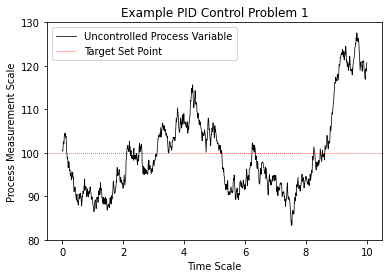

In [3]:
fig, ax = plt.subplots()
ax.plot(T, UPV, linewidth=0.75, color="k", label='Uncontrolled Process Variable')
ax.axhline(y=SP, linewidth=0.75, color='r', ls=":", label='Target Set Point')
ax.set_ylim(bottom=80, top=130)
ax.set_title("Example PID Control Problem 1")
ax.set_xlabel("Time Scale")
ax.set_ylabel("Process Measurement Scale")
ax.legend()

## Solution

Next we solve the problem using PID controller.

In [4]:
Kp = 0.01 # Proportional gain constant
Ki = 0.01 # Integral gain constant
Kd = 0.01 # Derivative gain constant
dt = T[1]-T[0] # Time step size constant

E = SP - UPV # Error array
PE = np.concatenate((np.array([0]), np.diff(E))) # Previous Errors array

P = E # Proportional array
I = (E*dt).cumsum() # Integral array
D = (E-PE)/dt # Derivative array

Ut = Kp*P + Ki*I + Kd*D # Control Signal array

CPV = UPV + Ut # Controlled Process Variable array

And we visualize the result.

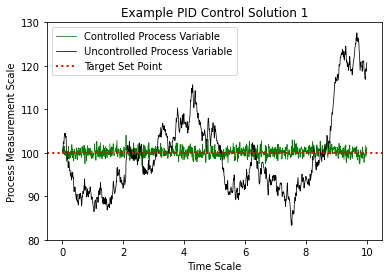

In [5]:
fig, ax = plt.subplots()
ax.plot(T, CPV, linewidth=0.75, color="g", label='Controlled Process Variable')
ax.plot(T, UPV, linewidth=0.75, color="k", label='Uncontrolled Process Variable')
ax.axhline(y=SP, linewidth=2, color='r', ls=":", label='Target Set Point')
ax.set_ylim(bottom=80, top=130)
ax.set_title("Example PID Control Solution 1")
ax.set_xlabel("Time Scale")
ax.set_ylabel("Process Measurement Scale")
ax.legend()